In [1]:
#Importing our python's data manipulation libraries
import pandas as pd
import numpy as np

In [2]:
#Reading our data set
data = pd.read_csv("cars.csv")

I - Data Cleaning

In [3]:
data.sample(10)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
17982,Volkswagen,Passat,mechanical,brown,314051,1985,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,False,32
21222,Audi,100,mechanical,black,552925,1992,diesel,False,diesel,2.4,...,False,False,False,False,False,False,False,False,False,32
31855,Skoda,Rapid,mechanical,white,120000,2015,gasoline,False,gasoline,1.6,...,True,True,True,True,True,True,True,True,True,2
1289,Kia,Rio,mechanical,red,185000,2013,gasoline,False,gasoline,1.6,...,True,False,False,False,True,False,False,True,True,23
26142,Nissan,Almera Tino,mechanical,black,308000,2003,diesel,False,diesel,2.2,...,True,False,False,False,False,False,False,True,False,7
3582,Opel,Corsa,mechanical,green,227000,1994,gasoline,False,gasoline,1.4,...,False,False,False,False,False,False,False,False,True,215
29324,BMW,X5,automatic,white,260000,2008,diesel,False,diesel,3.0,...,True,True,True,True,True,True,True,True,True,35
10004,Ford,Fusion,automatic,red,196000,2007,gasoline,False,gasoline,1.4,...,True,False,False,False,False,False,False,False,True,93
7771,Porsche,Cayenne,automatic,black,130000,2011,gasoline,False,gasoline,3.6,...,True,True,True,True,True,True,True,True,True,58
29554,BMW,X5,automatic,black,333333,2001,gasoline,False,gasoline,4.4,...,True,True,True,True,True,True,True,True,True,52


In [4]:
data.shape

(38531, 30)

In [5]:
#check na value
data.isna().values.any()

True

In [6]:
#Deleting na values
data = data.dropna()
data.isna().values.any()
data.shape

(38521, 30)

In [7]:
data.shape

(38521, 30)

In [8]:
#Deleting some invalid columns
data = data.iloc[:,0:19]
data.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7


In [9]:
data.shape
data=data.drop(columns="engine_has_gas")
data=data.drop(columns="engine_type")
data=data.drop(columns="location_region")

In [10]:
#Show some limited values
print("Transmission: ", data.transmission.unique())
print("Engine Fuel: ", data.engine_fuel.unique())
print("Body Type: ", data.body_type.unique())
print("State: ", data.state.unique())
print("Driven Train: ", data.drivetrain.unique())

Transmission:  ['automatic' 'mechanical']
Engine Fuel:  ['gasoline' 'gas' 'diesel' 'hybrid-petrol' 'hybrid-diesel']
Body Type:  ['universal' 'suv' 'sedan' 'hatchback' 'liftback' 'minivan' 'minibus'
 'van' 'pickup' 'coupe' 'cabriolet' 'limousine']
State:  ['owned' 'emergency' 'new']
Driven Train:  ['all' 'front' 'rear']


In [11]:
data.shape

(38521, 16)

In [12]:
# let's encode text or categorical data using one hot encoding
# let's create  dummy variables for columns that have limited values
dummy = pd.get_dummies(data[["engine_fuel", "body_type", "transmission","state","drivetrain","color","has_warranty","is_exchangeable"]], drop_first = True)
dummy.head()

,has_warranty,is_exchangeable,engine_fuel_gas,engine_fuel_gasoline,engine_fuel_hybrid-diesel,engine_fuel_hybrid-petrol,body_type_coupe,body_type_hatchback,body_type_liftback,body_type_limousine,...,color_brown,color_green,color_grey,color_orange,color_other,color_red,color_silver,color_violet,color_white,color_yellow
0,False,False,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,False,True,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,True,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,False,True,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,True,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.shape

(38521, 16)

In [14]:
# Concat dummy vars to the data
data = pd.concat( [data, dummy], axis = 1)
# now we don't need that original text data columns so let's drop it
data.drop(columns = ["engine_fuel", "body_type", "transmission","state","drivetrain","color","has_warranty","is_exchangeable"], inplace = True)

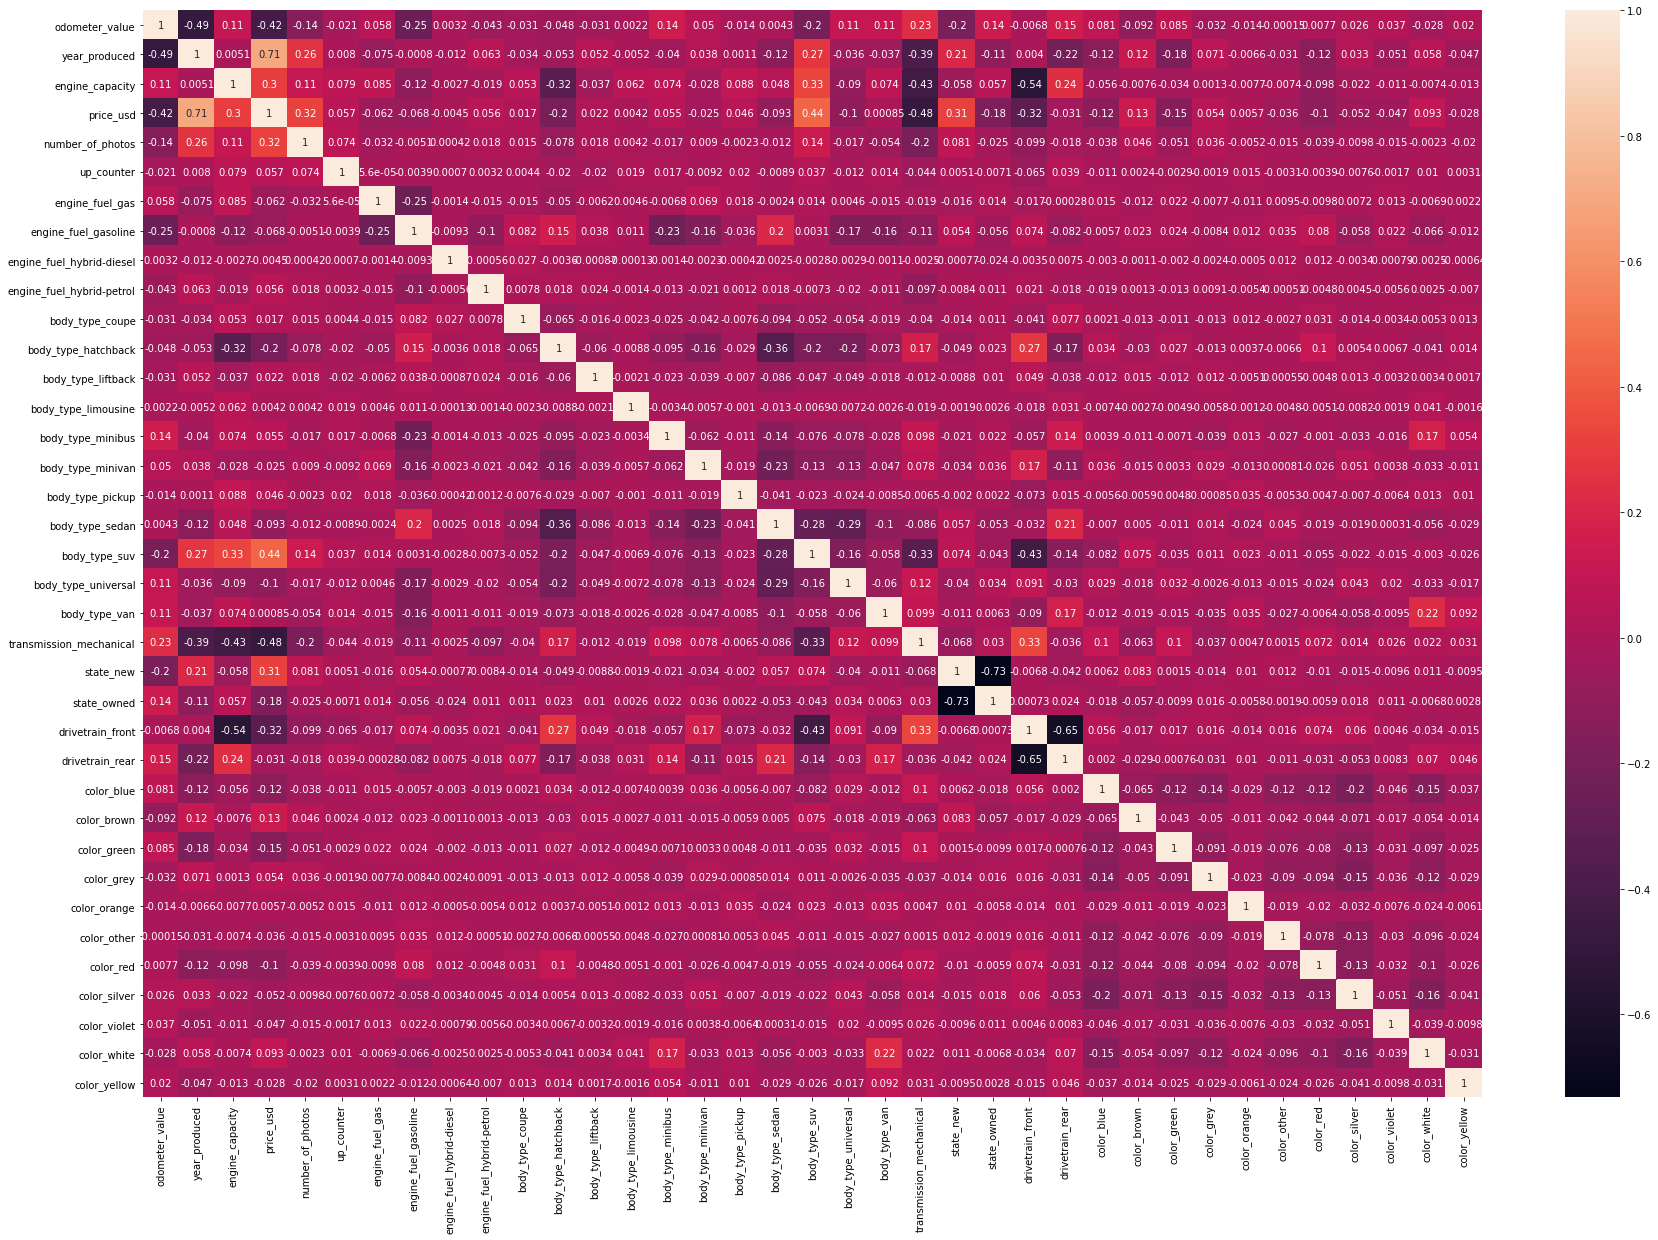

In [15]:
# let's get a corelation of our data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (30, 20))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [16]:
data.shape

(38521, 39)

In [17]:
#For Manufacturer and model names
data.manufacturer_name = data.	manufacturer_name.str.lower()
data.model_name = data.model_name.str.lower()

dummy = pd.get_dummies(data[["manufacturer_name","model_name"]], drop_first = True)
# here we dropped first columns which is 800 for prevent dummy variable trap 

data = pd.concat([data, dummy], axis = 1)
# now we don't need Car_Name columns so let's drop it
data.drop(columns = ["manufacturer_name", "model_name"], inplace = True)

In [18]:
X = data.drop(columns="price_usd")
y = data.price_usd

In [19]:
data.shape

(38521, 1206)

In [20]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()
etr.fit(X, y)
important_features = etr.feature_importances_

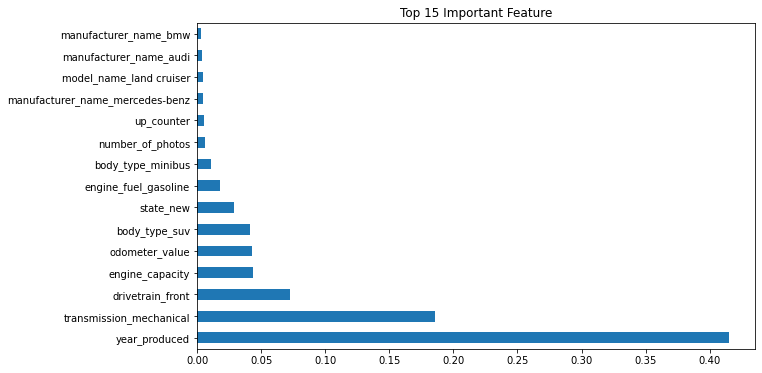

In [21]:
important_features = pd.Series(important_features, index = X.columns).sort_values(ascending = False)
# let's plot top 5 important feature

plt.figure(figsize = (10, 6))
important_features[:15].plot(kind = "barh")
plt.title("Top 15 Important Feature")

plt.show()

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [24]:
algos = {
    "Linear Regression": {
        "model": LinearRegression(),
        "param":{
            "normalize":[True, False]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(),
        "param": {
            "criterion": ["mse", "friedman_mse"],
            "splitter": ["best", "random"]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(),
        "param": {
            "n_estimators": [int(x) for x in np.linspace(100, 1200, 12)],
            "max_features": ["auto", "sqrt"],
            "max_depth": [int(x) for x in np.linspace(5, 30, 6)],
            "min_samples_split": [2, 5, 10, 15, 100],
            "min_samples_leaf": [1, 2, 5, 10]
        }
    }
}

In [25]:
from sklearn.model_selection import RandomizedSearchCV

best_models = {}
scores = []
for model_name, values in algos.items():
    model_tunning = RandomizedSearchCV(values["model"], values["param"], n_iter=10, cv = 5, n_jobs = -1)
    model_tunning.fit(X_train, y_train)
    
    best_models[model_name] = model_tunning
    scores.append({
        "Model": model_name,
        "Best Parameters": model_tunning.best_params_,
        "Best Score": model_tunning.best_score_
    })
    
pd.DataFrame(scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,Model,Best Parameters,Best Score
0,Linear Regression,{'normalize': False},-634324.816986
1,Decision Tree,"{'splitter': 'random', 'criterion': 'friedman_...",0.857793
2,Random Forest,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.910842


In [26]:
for name, model in best_models.items():
    print(name, " : ", model.score(X_test, y_test))

Linear Regression  :  0.8256813334240837
Decision Tree  :  0.860483943765626
Random Forest  :  0.9117572641358073


In [27]:
final_model = best_models["Random Forest"]

In [28]:
def predict_price(manufacturer_name, model_name, mechanical,  odometer_value, year_produced, gasoline, engine_capacity, suv, minibus ,new, front, number_of_photos, up_counter):
    manufacturer="manufacturer_name_"+manufacturer_name
    model="model_name_"+model_name
    manufacturer_index = np.where(X.columns == manufacturer.lower())[0][0]
    X_pred = np.zeros_like(X.columns)
    
    feature_list = [mechanical,  odometer_value, year_produced, gasoline, engine_capacity, suv, minibus ,new, front, number_of_photos, up_counter]
    count = 0
    for f in feature_list:
        X_pred[count] = f
        count += 1
    
    if manufacturer_index > 0:
        X_pred[manufacturer_index] = 1
    
    result = final_model.predict([X_pred])
    
    return result

In [29]:
predict_price("Chrysler", "Voyager", 0, 297729, 2000, 1, 2.4,0,0,0,1,4,73)

array([39632.55463438])

In [30]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(final_model, f)

In [31]:
import json

column_dict = {"data_columns": X.columns.to_list()}

with open("columns.json", "w") as f:
    json.dump(column_dict, f)

In [32]:
predict_price("Chrysler", "Voyager", 0, 297729, 2000, 1, 2.4,0,0,0,1,4,73)

array([39632.55463438])

In [33]:
X

,odometer_value,year_produced,engine_capacity,number_of_photos,up_counter,engine_fuel_gas,engine_fuel_gasoline,engine_fuel_hybrid-diesel,engine_fuel_hybrid-petrol,body_type_coupe,...,model_name_zeta,model_name_zx,model_name_а21,model_name_а22,model_name_вис,model_name_луидор,model_name_м20,model_name_м5,model_name_соболь,model_name_таврия
0,190000,2010,2.5,9,13,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,290000,2002,3.0,12,54,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,402000,2001,2.5,4,72,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10000,1999,3.0,9,42,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,280000,2001,2.5,14,7,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,3.5,5,85,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38527,321000,2004,2.2,4,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38528,777957,2000,3.5,3,63,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38529,20000,2001,2.0,7,156,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
